<a href="https://colab.research.google.com/github/LaureanoTorres/Curso-Data-Science-Tarea-1/blob/main/TrabajoLau1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Marketing**

##Contexto:
 Una empresa ficticia o no, está estudiando el comportamiento de sus clientes y nos han contratado para entender un poco sobre que compran, quienes compran y cualquier otro dato que podamos brindarles.

## Interes de la Investigación:
 El objetivo principal será determinar cuales son los productos que mas dinero generan y cual es el método que mejor funciona para vender.Tambien conocer el tipo de clientes que posee la empresa para así poder determinar cual sería el mejor plan de marketing.

## Diccionario (Pre-Manipulación):
**ID:** Es el identificador único de cada cliente.
**Year_Birth:** Fecha de nacimiento del cliente.
**Education**: Nivel de educación alcanzado por el cliente.
**Marital_Status:** Estado civil del cliente.
**Income:** Ingreso anual de dinero a la casa del cliente.
**Kidhome:** Número de niños en la casa del cliente.
**Teenhome:** Número de adolecentes en la casa del cliente.
**Dt_Customer:** Fecha en que el cliente se enroló con la compañia.
**Recency:** Número de dias desde la última compra del cliente.
**MntWines:** Total gastado en vino por el cliente en los últimos 2 años.
**MntFruits:** Total gastado en frutas por el cliente en los últimos 2 años.
**MntMeatProducts:** Total gastado en carne por el cliente en los últimos 2 años.
**MntFishProducts:** Total gastado en pescado por el cliente en los últimos 2 años.
**MntSweetProducts:** Total gastado en dulces por el cliente en los últimos 2 años.
**MntGoldProds:** Total gastado en oro por el cliente en los últimos 2 años.
**NumDealsPurchases:** Cantidad de compras hechas con un descuento.
**NumWebPurchases:** Cantidad de compras hechas por el sitio web de la empresa.
**NumCatalogPurchases:** Cantidad de compras hechas por catálogo.
**NumStorePurchases:** Cantidad de compras hechas directamente en la tienda física.
**NumWebVisitsMonth:** Cantidad de visitas que tuvo la web de la compañia el ultimo mes.
**AcceptedCmp1:** Si el cliente aceptó la oferta en la primera campaña = 1 sinó 0.
**AcceptedCmp2:** Si el cliente aceptó la oferta en la segunda campaña = 1 sinó 0.
**AcceptedCmp3:** Si el cliente aceptó la oferta en la tercer campaña = 1 sinó 0.
**AcceptedCmp4:** Si el cliente aceptó la oferta en la cuarta campaña = 1 sinó 0.
**AcceptedCmp5:** Si el cliente aceptó la oferta en la quinta campaña = 1 sinó 0.
**Response:** Si el cliente aceptó la oferta en la última campaña = 1 sinó 0.
**Complain:** Si el cliente se quejó en los ultimos 2 años = 1 sinó 0.
**Country:** Pais del cliente.



##Diccionario (Post-Manipulación):
*  Edad = Edad del cliente.          
*  Educacion = Nivel de educación alcanzado por el cliente.       
*  Estado_Civil = Estado civil del cliente.
*  Income = Ingreso del cliente en dolares por año.
*  NiñosEncasa = Cantidad de niños en la vivienda del cliente.         
*  AdolecentesEncasa = Cantidad de adolecentes en la vivinda del cliente.   
*  Vinos = Dinero gastado en vino por compra.            
*  Frutas = Dinero gastado en frutas por compra.              
*  Carnes = Dinero gastado en carnes por compra.               
*  Pescados = Dinero gastado en pescados por compra.            
*  Dulces = Dinero gastado en dulces por compra.
*  Oro = Dinero gastado en oro por compra.
*  Ofertas = Cantidad de compras hechas como ofertas.             
*  Web = Cantidad de compras hechas por la web.
*  Catalogo = Cantidad de compras hechas por catalogo.
*  Tienda_fisica = Cantidad de compras hechas en la tienda fisica.      
*  Visitas-web = Cantidad de visitas al sitio web.
*  Quejas = Cantidad de quejas en últimos 2 años por el cliente.
*  Pais = Pais de origen del cliente.

## Fuente del DataSet: https://mavenanalytics.io/



```
# Tiene formato de código
```

# Exploración y Manipulación del DataSet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Marketing+Data/Trabajo Practico 1 D.S./marketing_data.csv')

In [3]:
import numpy as np

In [4]:
data=data.drop(['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Recency', 'Dt_Customer'], axis=1)

Eliminé las columnas ID, Accepeted (todas), y response. ya que no me interesaba saber el numero de ID, ni si aceptaron o no la oferta en terminada campaña, ya que me voy a enfocar en solamente en analisis de estos 2 años de compras.
Tampoco veré recency porque voy a ver globalmente los dos años y no necesito saber hace cuanto fue la última compra, tampoco saber hace cuanto son clientes.

In [5]:
data.drop(data[data['Year_Birth'] <= 1930].index, inplace=True)

Acá eliminé los nacidos antes de 1930 ya que eran solo 3, y sus edades se iban demasiado lejos del resto de personas, considero que han sido un error de tipeo y por eso los quité.

In [6]:
data['Year_Birth'] = 2023 - data['Year_Birth']
data=data.rename(columns={'Year_Birth': 'Edad'})

Acá transformé la columna a años y la renombre a Edad

In [7]:
#Comprobar que se hayan eliminado los mayores de 100 años
data.loc[data['Edad']>100]

,Edad,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Country


In [8]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], ['Single','Single', 'Single' ])

Acá cambié estas variables a single, ya que considero que así se agrupan mejor.

In [9]:
data['Education'] = data['Education'].replace(['Graduation', 'Basic', '2n Cycle'], ['Universitario','Secundario', 'Terciario' ])

acá renombré las categorias de educacion para que sean mas entendibles para el lector promedio

In [10]:
data=data.rename(columns={'MntWines': 'Vinos','MntFruits': 'Frutas', 'MntMeatProducts': 'Carnes', 'MntFishProducts': 'Pescados', 'MntSweetProducts': 'Dulces', 'MntGoldProds': 'Oro', 'Kidhome': 'NiñosEncasa', 'Teenhome': 'AdolecentesEncasa', 'NumDealsPurchases': 'Ofertas', 'NumWebPurchases': 'Web', 'NumCatalogPurchases': 'Catalogo', 'NumStorePurchases': 'Tienda_fisica', 'NumWebVisitsMonth': 'Visitas-web', 'Complain': 'Quejas', 'Income': 'Ingreso', 'Education': 'Educacion', 'Marital_Status': 'Estado_Civil', 'Country': 'Pais', ' Income ': 'Ingreso' })

Acá transforme a español todas las columnas

In [11]:
data['Estado_Civil'] = data['Estado_Civil'].replace(['Married', 'Together', 'Single', 'Divorced', 'Widow'], ['Casado','Concubinato', 'Soltero', 'Divorciado', 'Viudo' ])

Pasé a español los elementos del grupo



In [12]:
data.drop(data[data['Ingreso'] >= 660000.0].index, inplace=True)

acá eliminé una columna que era de 666666, era muy sospechoso el número, y se desviaba demasiado del promedio. Considero que fue una broma por parte del entrevistado

In [13]:
mean_ingreso = data['Ingreso'].mean()

# Reemplazar los valores NaN por el valor promedio (mean) en la columna "Ingreso"
data['Ingreso'].fillna(mean_ingreso, inplace=True)

Reemplace los valores Nan del ingreso por el promedio

In [14]:
data.head (n=10)

,Edad,Educacion,Estado_Civil,Ingreso,NiñosEncasa,AdolecentesEncasa,Vinos,Frutas,Carnes,Pescados,Dulces,Oro,Ofertas,Web,Catalogo,Tienda_fisica,Visitas-web,Quejas,Pais
0,53,Universitario,Divorciado,84835.0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,Spain
1,62,Universitario,Soltero,57091.0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,Canada
2,65,Universitario,Casado,67267.0,0,1,134,11,59,15,2,30,1,3,2,5,2,0,USA
3,56,Universitario,Concubinato,32474.0,1,1,10,0,1,0,0,0,1,1,0,2,7,0,Australia
4,34,Universitario,Soltero,21474.0,1,0,6,16,24,11,0,34,2,3,1,2,7,0,Spain
5,65,PhD,Soltero,71691.0,0,0,336,130,411,240,32,43,1,4,7,5,2,0,Spain
6,69,Terciario,Casado,63564.0,0,0,769,80,252,15,34,65,1,10,10,7,6,0,Germany
7,56,Universitario,Concubinato,44931.0,0,1,78,0,11,0,0,7,1,2,1,3,5,0,Spain
8,69,PhD,Casado,65324.0,0,1,384,0,102,21,32,5,3,6,2,9,4,0,USA
9,69,PhD,Casado,65324.0,0,1,384,0,102,21,32,5,3,6,2,9,4,0,India


In [15]:
data['Estado_Civil'].value_counts()

Casado         864
Concubinato    578
Soltero        486
Divorciado     231
Viudo           77
Name: Estado_Civil, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Edad               2236 non-null   int64  
 1   Educacion          2236 non-null   object 
 2   Estado_Civil       2236 non-null   object 
 3   Ingreso            2236 non-null   float64
 4   NiñosEncasa        2236 non-null   int64  
 5   AdolecentesEncasa  2236 non-null   int64  
 6   Vinos              2236 non-null   int64  
 7   Frutas             2236 non-null   int64  
 8   Carnes             2236 non-null   int64  
 9   Pescados           2236 non-null   int64  
 10  Dulces             2236 non-null   int64  
 11  Oro                2236 non-null   int64  
 12  Ofertas            2236 non-null   int64  
 13  Web                2236 non-null   int64  
 14  Catalogo           2236 non-null   int64  
 15  Tienda_fisica      2236 non-null   int64  
 16  Visitas-web        2236 

In [17]:
data.dtypes

Edad                   int64
Educacion             object
Estado_Civil          object
Ingreso              float64
NiñosEncasa            int64
AdolecentesEncasa      int64
Vinos                  int64
Frutas                 int64
Carnes                 int64
Pescados               int64
Dulces                 int64
Oro                    int64
Ofertas                int64
Web                    int64
Catalogo               int64
Tienda_fisica          int64
Visitas-web            int64
Quejas                 int64
Pais                  object
dtype: object

In [18]:
data.describe()

,Edad,Ingreso,NiñosEncasa,AdolecentesEncasa,Vinos,Frutas,Carnes,Pescados,Dulces,Oro,Ofertas,Web,Catalogo,Tienda_fisica,Visitas-web,Quejas
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,54.101968,51958.810579,0.444097,0.506708,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.008945
std,11.703281,21411.384172,0.538459,0.544609,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.094173
min,27.000000,1730.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,35502.500000,0.000000,0.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,53.000000,51684.000000,0.000000,0.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,64.000000,68275.750000,1.000000,1.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,83.000000,162397.000000,2.000000,2.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [19]:
data.shape

(2236, 19)

In [20]:
data.columns

Index(['Edad', 'Educacion', 'Estado_Civil', 'Ingreso', 'NiñosEncasa',
       'AdolecentesEncasa', 'Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces',
       'Oro', 'Ofertas', 'Web', 'Catalogo', 'Tienda_fisica', 'Visitas-web',
       'Quejas', 'Pais'],
      dtype='object')

In [21]:
data['Educacion'].value_counts()

Universitario    1126
PhD               485
Master            370
Terciario         201
Secundario         54
Name: Educacion, dtype: int64

In [22]:
data['Pais'].value_counts()

Spain           1094
Saudi Arabia     335
Canada           268
Australia        160
India            147
Germany          120
USA              109
Mexico             3
Name: Pais, dtype: int64

In [23]:
total_by_NiñosEncasa = data.groupby('NiñosEncasa')['Vinos','Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro' ].sum()
print(total_by_NiñosEncasa)

              Vinos  Frutas  Carnes  Pescados  Dulces    Oro
NiñosEncasa                                                 
0            582604   50791  327850     72507   52301  77402
1             93835    7637   43901     11053    8025  20108
2              3590     325    1624       371     226    836


<ipython-input-23-09eface0cf4a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_by_NiñosEncasa = data.groupby('NiñosEncasa')['Vinos','Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro' ].sum()


In [24]:
total_by_AdolecentesEncasa = data.groupby('AdolecentesEncasa')['Vinos','Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro' ].sum()
print(total_by_AdolecentesEncasa)

                    Vinos  Frutas  Carnes  Pescados  Dulces    Oro
AdolecentesEncasa                                                 
0                  352206   38409  262417     56227   38876  52146
1                  309002   19433  104470     26461   20840  43863
2                   18821     911    6488      1243     836   2337


<ipython-input-24-960d28d7e0c8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_by_AdolecentesEncasa = data.groupby('AdolecentesEncasa')['Vinos','Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro' ].sum()


In [25]:
data['Hijos'] = data['AdolecentesEncasa'] | data['NiñosEncasa']

# Columnas de productos
productos = ['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']

# Calcular el gasto en cada producto en cada grupo
total_gasto_por_grupo = data.groupby('Hijos')[productos].sum()

print(total_gasto_por_grupo)

        Vinos  Frutas  Carnes  Pescados  Dulces    Oro
Hijos                                                 
0      310146   33260  237163     48733   33789  40703
1      347472   24257  128100     33584   25701  54470
2       13328     870    4719      1239     711   2187
3        9083     366    3393       375     351    986


acá veo el gasto combinado entre cantegorias de hijos

In [26]:
data['Grupo'] = data['AdolecentesEncasa'] | data['NiñosEncasa']

# Columnas de productos
productos = ['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']

# Calcular el gasto en cada producto en cada grupo
total_gasto_por_grupo = data.groupby('Grupo')[productos].mean()

print(total_gasto_por_grupo)

            Vinos     Frutas      Carnes   Pescados     Dulces        Oro
Grupo                                                                    
0      486.885400  52.213501  372.312402  76.503925  53.043956  63.897959
1      231.802535  16.182121   85.456971  22.404270  17.145430  36.337558
2      283.574468  18.510638  100.404255  26.361702  15.127660  46.531915
3      171.377358   6.905660   64.018868   7.075472   6.622642  18.603774


In [27]:
Quejas_counts = data['Quejas'].value_counts()

print(Quejas_counts)

0    2216
1      20
Name: Quejas, dtype: int64


muy poca gente se ha quejado en los ultimos 2 años

In [28]:
medios_de_venta = ['Ofertas', 'Web', 'Catalogo', 'Tienda_fisica']

# Calcular el promedio del gasto por cada medio de venta
promedio_gasto_por_medio_venta = data[medios_de_venta].mean()

print("Promedio del gasto por cada medio de venta:")
print(promedio_gasto_por_medio_venta)

Promedio del gasto por cada medio de venta:
Ofertas          2.326029
Web              4.087657
Catalogo         2.663238
Tienda_fisica    5.795617
dtype: float64


In [29]:
medios_de_venta = ['Ofertas', 'Web', 'Catalogo', 'Tienda_fisica']

# Calcular la suma total del gasto en cada medio de venta en cada categoría
suma_total_gasto_por_medio_venta = data.groupby('Estado_Civil')[medios_de_venta].mean()

print("Promedio del gasto en cada medio de venta por estado civil:")
print(suma_total_gasto_por_medio_venta)

Promedio del gasto en cada medio de venta por estado civil:
               Ofertas       Web  Catalogo  Tienda_fisica
Estado_Civil                                             
Casado        2.392361  4.087963  2.625000       5.850694
Concubinato   2.323529  4.083045  2.673010       5.743945
Divorciado    2.441558  4.320346  2.679654       5.835498
Soltero       2.154321  3.897119  2.606996       5.641975
Viudo         2.337662  4.623377  3.324675       6.415584


In [30]:
data.columns

Index(['Edad', 'Educacion', 'Estado_Civil', 'Ingreso', 'NiñosEncasa',
       'AdolecentesEncasa', 'Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces',
       'Oro', 'Ofertas', 'Web', 'Catalogo', 'Tienda_fisica', 'Visitas-web',
       'Quejas', 'Pais', 'Hijos', 'Grupo'],
      dtype='object')

In [31]:
distribucion_income_por_educacion = data.groupby('Educacion')['Ingreso'].describe()

print(distribucion_income_por_educacion)

                count          mean           std     min       25%  \
Educacion                                                             
Master          370.0  52904.578521  20021.058689  6560.0  37853.75   
PhD             485.0  56045.686707  20494.020639  4023.0  40637.00   
Secundario       54.0  20306.259259   6235.066773  7500.0  15405.25   
Terciario       201.0  47690.012098  22038.450902  7500.0  27733.00   
Universitario  1126.0  52167.689091  21249.671754  1730.0  34920.75   

                        50%      75%       max  
Educacion                                       
Master         51044.500000  66596.0  157733.0  
PhD            54998.000000  69084.0  162397.0  
Secundario     20744.000000  24882.0   34445.0  
Terciario      46891.000000  65370.0   96547.0  
Universitario  51958.810579  69696.0  157146.0  


In [32]:
top_10_ingresos= data.nlargest(10, 'Ingreso')

print("Top 10 de ingreso")
print(top_10_ingresos)

Top 10 de ingreso
      Edad      Educacion Estado_Civil   Ingreso  NiñosEncasa  \
731     47            PhD  Concubinato  162397.0            1   
497     41            PhD       Casado  160803.0            0   
853     52         Master  Concubinato  157733.0            1   
2204    50            PhD       Casado  157243.0            0   
325     46  Universitario  Concubinato  157146.0            0   
1925    74            PhD       Casado  156924.0            0   
1826    48  Universitario   Divorciado  153924.0            0   
210     78            PhD      Soltero  113734.0            0   
832     53  Universitario  Concubinato  105471.0            0   
142     49  Universitario   Divorciado  102692.0            0   

      AdolecentesEncasa  Vinos  Frutas  Carnes  Pescados  ...  Oro  Ofertas  \
731                   1     85       1      16         2  ...    2        0   
497                   0     55      16    1622        17  ...    4       15   
853                   0     3

In [33]:
distribucion_income_por_educacion = data.groupby('Educacion')['Ingreso'].mean()

distribucion_income_por_educacion = distribucion_income_por_educacion.round(1)

print(distribucion_income_por_educacion)

Educacion
Master           52904.6
PhD              56045.7
Secundario       20306.3
Terciario        47690.0
Universitario    52167.7
Name: Ingreso, dtype: float64


In [34]:
data.groupby('Estado_Civil').mean()

<ipython-input-34-99dd7bf2d7c1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Estado_Civil').mean()


,Edad,Ingreso,NiñosEncasa,AdolecentesEncasa,Vinos,Frutas,Carnes,Pescados,Dulces,Oro,Ofertas,Web,Catalogo,Tienda_fisica,Visitas-web,Quejas,Hijos,Grupo
Estado_Civil,,,,,,,,,,,,,,,,,,
Casado,53.420139,51726.873465,0.456019,0.511574,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917,2.392361,4.087963,2.625000,5.850694,5.364583,0.009259,0.803241,0.803241
Concubinato,55.150519,52116.271062,0.449827,0.531142,306.565744,25.164360,167.681661,38.932526,26.100346,42.735294,2.323529,4.083045,2.673010,5.743945,5.266436,0.008651,0.804498,0.804498
Divorciado,56.437229,52904.333333,0.411255,0.593074,326.186147,27.519481,150.822511,35.164502,26.917749,46.380952,2.441558,4.320346,2.679654,5.835498,5.489177,0.004329,0.813853,0.813853
Soltero,51.318930,51027.200196,0.465021,0.407407,288.683128,26.888889,181.504115,38.639918,27.106996,44.364198,2.154321,3.897119,2.606996,5.641975,5.288066,0.012346,0.728395,0.728395
Viudo,64.441558,56422.815722,0.233766,0.636364,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234,2.337662,4.623377,3.324675,6.415584,4.883117,0.000000,0.662338,0.662338


In [35]:
data.groupby('Pais').mean()

<ipython-input-35-db1ec696761f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Pais').mean()


,Edad,Ingreso,NiñosEncasa,AdolecentesEncasa,Vinos,Frutas,Carnes,Pescados,Dulces,Oro,Ofertas,Web,Catalogo,Tienda_fisica,Visitas-web,Quejas,Hijos,Grupo
Pais,,,,,,,,,,,,,,,,,,
Australia,55.475000,51816.840860,0.518750,0.518750,277.325000,24.275000,144.356250,36.462500,28.800000,49.800000,2.262500,4.087500,2.618750,5.493750,5.168750,0.000000,0.843750,0.843750
Canada,54.917910,53042.468736,0.417910,0.555970,315.854478,28.902985,172.194030,37.417910,28.649254,45.832090,2.402985,4.305970,2.742537,5.850746,5.287313,0.007463,0.813433,0.813433
Germany,54.275000,52918.018686,0.400000,0.450000,312.358333,25.516667,173.950000,39.725000,23.916667,48.808333,2.150000,3.975000,2.766667,6.008333,5.175000,0.008333,0.691667,0.691667
India,51.551020,49120.624562,0.517007,0.496599,246.619048,25.741497,172.299320,32.809524,21.911565,40.891156,2.476190,3.959184,2.476190,5.326531,5.503401,0.000000,0.823129,0.823129
Mexico,50.666667,57680.333333,0.000000,0.666667,576.333333,2.666667,272.333333,75.333333,40.666667,73.333333,2.333333,6.000000,5.000000,6.333333,6.000000,0.000000,0.666667,0.666667
Saudi Arabia,53.614925,52988.468657,0.486567,0.477612,316.122388,26.635821,174.253731,40.761194,26.919403,45.119403,2.417910,4.158209,2.734328,5.919403,5.289552,0.008955,0.800000,0.800000
Spain,54.130713,51536.077350,0.426874,0.508227,308.259598,25.870201,163.144424,36.710238,27.559415,42.082267,2.255941,4.001828,2.598720,5.802559,5.319013,0.012797,0.768739,0.768739
USA,54.633028,53195.262579,0.403670,0.513761,297.302752,27.926606,185.834862,40.706422,26.467890,44.532110,2.642202,4.440367,3.036697,6.036697,5.596330,0.000000,0.770642,0.770642


In [36]:
venta_exclusiva_ofertas = data[data['Ofertas'] > 0]
venta_total_exclusiva_ofertas = venta_exclusiva_ofertas[['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']].sum()
print("Venta total por columna en productos vendidos exclusivamente por ofertas:")
print(venta_total_exclusiva_ofertas)

Venta total por columna en productos vendidos exclusivamente por ofertas:
Vinos       655841
Frutas       56249
Carnes      353231
Pescados     80789
Dulces       57250
Oro          94827
dtype: int64


In [37]:
venta_exclusiva_Web = data[data['Web'] > 0]
venta_total_exclusiva_Web = venta_exclusiva_Web[['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']].sum()
print("Venta total por columna en productos vendidos exclusivamente por Web:")
print(venta_total_exclusiva_Web)

Venta total por columna en productos vendidos exclusivamente por Web:
Vinos       679400
Frutas       58654
Carnes      364860
Pescados     83831
Dulces       60474
Oro          98136
dtype: int64


In [38]:
venta_exclusiva_Catalogo = data[data['Catalogo'] > 0]
venta_total_exclusiva_Catalogo = venta_exclusiva_Catalogo[['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']].sum()
print("Venta total por columna en productos vendidos exclusivamente por Catalogo:")
print(venta_total_exclusiva_Catalogo)

Venta total por columna en productos vendidos exclusivamente por Catalogo:
Vinos       668317
Frutas       56919
Carnes      364085
Pescados     81322
Dulces       58277
Oro          92750
dtype: int64


In [39]:
venta_exclusiva_Tienda_fisica = data[data['Tienda_fisica'] > 0]
venta_total_exclusiva_Tienda_fisica = venta_exclusiva_Tienda_fisica[['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']].sum()
print("Venta total por columna en productos vendidos exclusivamente por Tienda_fisica:")
print(venta_total_exclusiva_Tienda_fisica)

Venta total por columna en productos vendidos exclusivamente por Tienda_fisica:
Vinos       679854
Frutas       58716
Carnes      368237
Pescados     83907
Dulces       59999
Oro          97631
dtype: int64


In [40]:
productos = ['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']

# Calcular el total gastado en cada producto
total_gastado_por_producto = data[productos].sum()

print("Total gastado en cada producto:")
print(total_gastado_por_producto)

Total gastado en cada producto:
Vinos       680029
Frutas       58753
Carnes      373375
Pescados     83931
Dulces       60552
Oro          98346
dtype: int64


In [41]:
Medio = ['Web', 'Catalogo', 'Tienda_fisica', 'Ofertas', 'Visitas-web']

# Calcular cantidad de ventas por medio
total_ventas_por_Medio= data[Medio].sum()

print("Total ventas por Medio:")
print(total_ventas_por_Medio)

Total ventas por Medio:
Web               9140
Catalogo          5955
Tienda_fisica    12959
Ofertas           5201
Visitas-web      11893
dtype: int64


In [42]:
Estado_Civil_proporcion = data['Estado_Civil'].value_counts() / len(data) * 100
Estado_Civil_proporcion

Casado         38.640429
Concubinato    25.849732
Soltero        21.735242
Divorciado     10.330948
Viudo           3.443649
Name: Estado_Civil, dtype: float64

In [43]:
productos = ['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']
total_generado_por_producto = data[productos].sum()
print(total_generado_por_producto)

Vinos       680029
Frutas       58753
Carnes      373375
Pescados     83931
Dulces       60552
Oro          98346
dtype: int64


#Gráficos

In [44]:
import matplotlib.pyplot as plt


In [45]:
import seaborn as sns

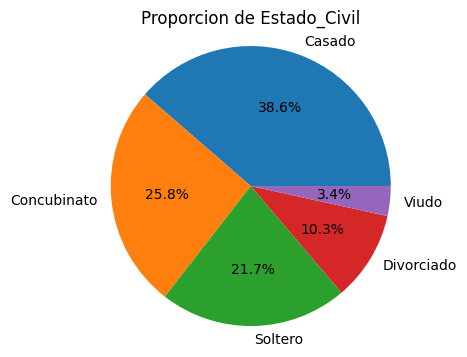

In [46]:
#Grafico Circular
Estado_Civil_proporcion = data['Estado_Civil'].value_counts() / len(data) * 100
plt.figure (figsize= (5, 4))
plt.pie(Estado_Civil_proporcion, labels=Estado_Civil_proporcion.index, autopct='%1.1f%%')
plt.title('Proporcion de Estado_Civil')
plt.axis ('equal')
plt.show()

La gran mayoria de clientes está casado o en concubinato

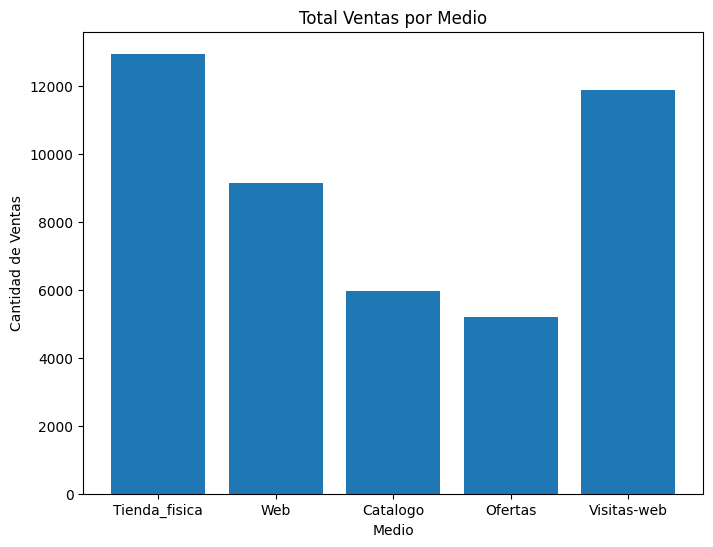

In [47]:
# Lista de medios
Medio = [ 'Tienda_fisica','Web', 'Catalogo', 'Ofertas', 'Visitas-web']

# Calcular cantidad de ventas por medio
total_ventas_por_Medio = data[Medio].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(total_ventas_por_Medio.index, total_ventas_por_Medio)
plt.xlabel('Medio')
plt.ylabel('Cantidad de Ventas')
plt.title('Total Ventas por Medio')
plt.show()

Se puede ver que todavia hay una fuerte tendencia a la vente a través de una tienda física, por eso al momento de la toma de estos datos es el mejor medio de venta, sin embargo la cantidad de visitas a la página web es alta, y la venta a través de la web también lo es. Es por esto que se le recomienda a la empresa realizar una campaña de marketing que se enfoque en incrementar las visitas a la pagina y la compra a travéß de ella.

<Figure size 1200x600 with 0 Axes>

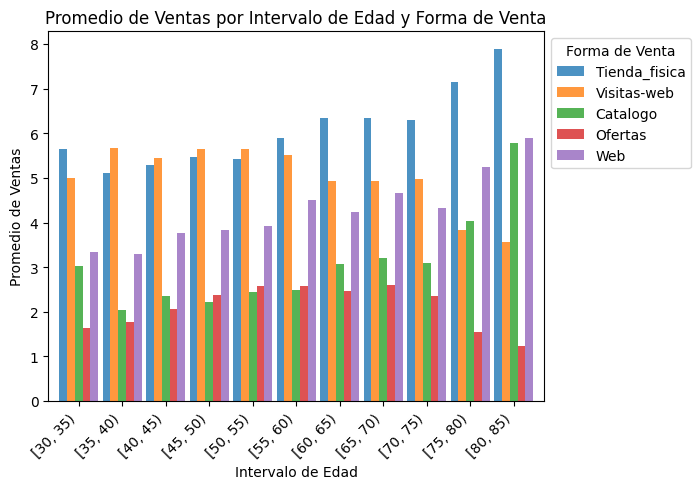

In [48]:
data['Edad_intervalo'] = pd.cut(data['Edad'], bins=range(30, 90, 5), right=False)

# Seleccionar las columnas de interés (Edad_intervalo, Tienda_fisica, Visitas-web, Catalogo, Ofertas y Web)
data_correlation = data[['Edad_intervalo', 'Tienda_fisica', 'Visitas-web', 'Catalogo', 'Ofertas', 'Web']]

# Calcular la media de cada forma de venta para cada intervalo de edad
data_grouped = data_correlation.groupby('Edad_intervalo').mean()

# Graficar el gráfico de barras
plt.figure(figsize=(12, 6))
data_grouped.plot(kind='bar', stacked=False, alpha=0.8, width=0.9)  # Ajusta el valor de width

plt.xlabel('Intervalo de Edad')
plt.ylabel('Promedio de Ventas')
plt.title('Promedio de Ventas por Intervalo de Edad y Forma de Venta')
plt.legend(title='Forma de Venta', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos observar que a mayor edad, aumenta la cantidad de compras que realiza cada cliente. Sin embargo, podemos decir que la tienda fisica es el método de preferencia de los clientes independientemente de su edad.

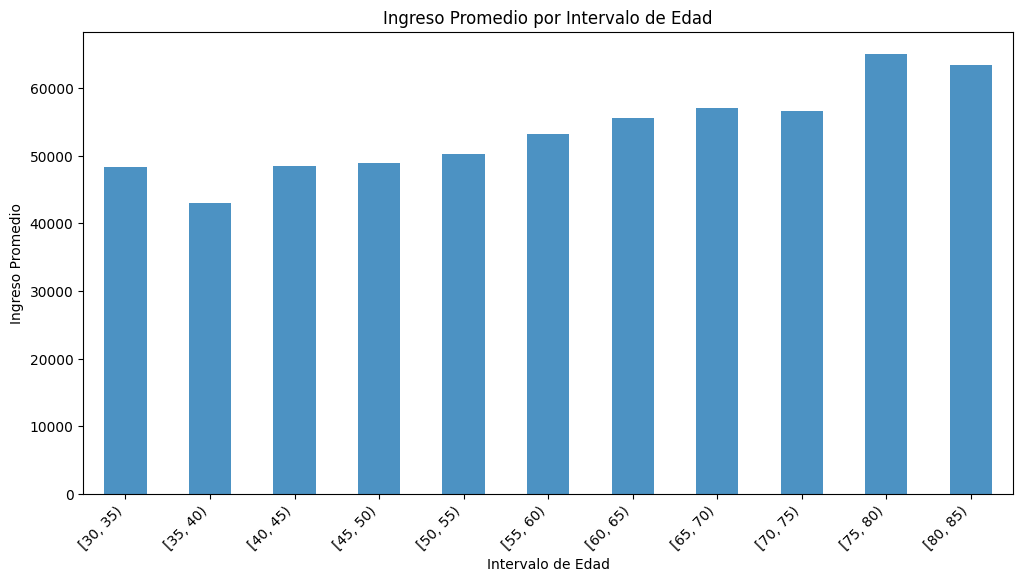

In [49]:
data['Edad_intervalo'] = pd.cut(data['Edad'], bins=range(30, 90, 5), right=False)

# Calcular el ingreso promedio para cada intervalo de edad
data_grouped = data.groupby('Edad_intervalo')['Ingreso'].mean()

# Graficar el gráfico de barras
plt.figure(figsize=(12, 6))
data_grouped.plot(kind='bar', alpha=0.8)

plt.xlabel('Intervalo de Edad')
plt.ylabel('Ingreso Promedio')
plt.title('Ingreso Promedio por Intervalo de Edad')
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos ver que a medida que aumenta la edad, el ingreso medio aumenta, posiblemente esto es lo que genera que a mayor edad, tengan mas dinero para gastar, como se veía en el gráfico anterior.

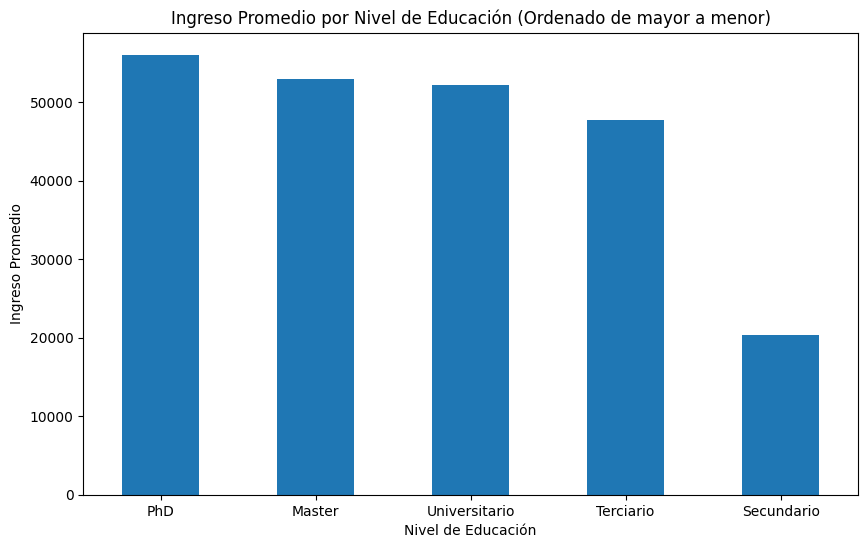

In [50]:
media_ingreso_por_educacion = data.groupby('Educacion')['Ingreso'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
media_ingreso_por_educacion.plot(kind='bar')
plt.xlabel('Nivel de Educación')
plt.ylabel('Ingreso Promedio')
plt.title('Ingreso Promedio por Nivel de Educación (Ordenado de mayor a menor)')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

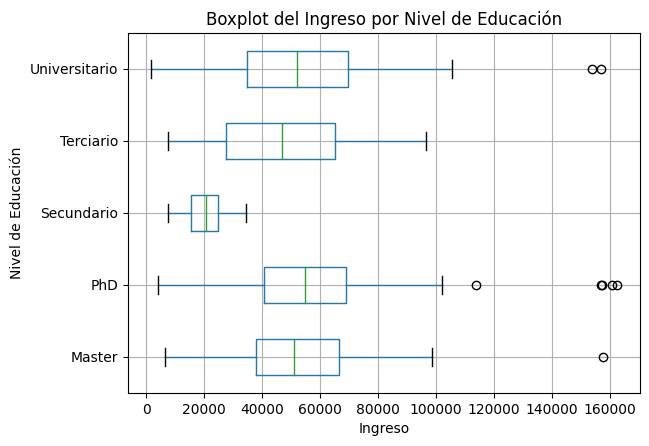

In [51]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Ingreso', by='Educacion', vert=False)
plt.xlabel('Ingreso')
plt.ylabel('Nivel de Educación')
plt.title('Boxplot del Ingreso por Nivel de Educación')
plt.suptitle('')
plt.show()

Se ve una clara diferenciación entre el ingreso de aquellos que solo terminaron el secundario y los que continuaron con carreras de grado superiores.

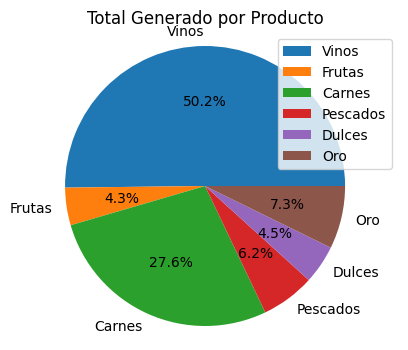

In [52]:
#Grafico Circular
productos = ['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']
total_generado_por_producto = data[productos].sum()
plt.figure(figsize=(5, 4))
total_generado_por_producto.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total Generado por Producto')
plt.legend(labels=total_generado_por_producto.index, loc='upper right')
plt.show()

Se puede observar que mas de la mitad del total generado corresponde a la venta de Vinos, pudiendo así determinar que este es el producto mayoritario seguido por la venta de Carnes.

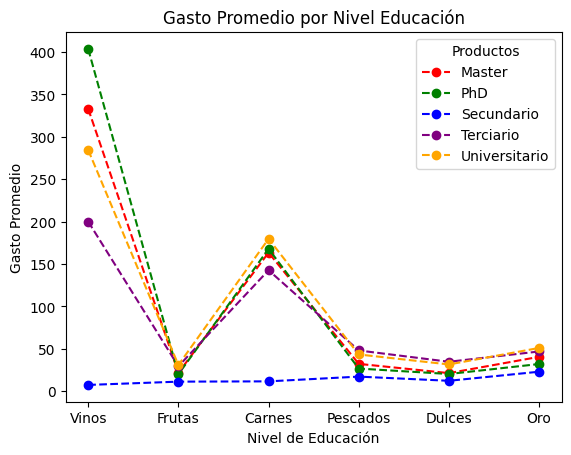

In [53]:
productos = ['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces', 'Oro']

# Calcular el gasto promedio por producto agrupado por nivel de educación
gasto_promedio_por_producto = data.groupby('Educacion')[productos].mean()

# Calcular la distribución de educación
distribucion_educacion = data['Educacion'].value_counts(normalize=True) * 100

# Crear líneas para el gasto promedio en cada producto
ax = gasto_promedio_por_producto.T.plot(kind='line', linestyle='--', marker='o', color=['red', 'green', 'blue', 'purple', 'orange', 'gray'])

# Etiquetas y leyendas
plt.xlabel('Nivel de Educación')
plt.ylabel('Gasto Promedio')
plt.title('Gasto Promedio por Nivel Educación')
plt.legend(title='Productos', bbox_to_anchor=(1, 1))

plt.show()

Se observa que dado que el grupo "secundario", tiene el ingreso mas bajo de todos, su nivel de compras es mínimo. mientras que en lineas generales a mayor estudios, mayor ingreso y por ende mayor gasto promedio en los productos.
A su vez, se observa que el producto con mayor diferencia de gastos es el vino. Aparentemente a mayor ingresos, se pueden permitir un mayor consumo del mimsmo.

<Figure size 1000x600 with 0 Axes>

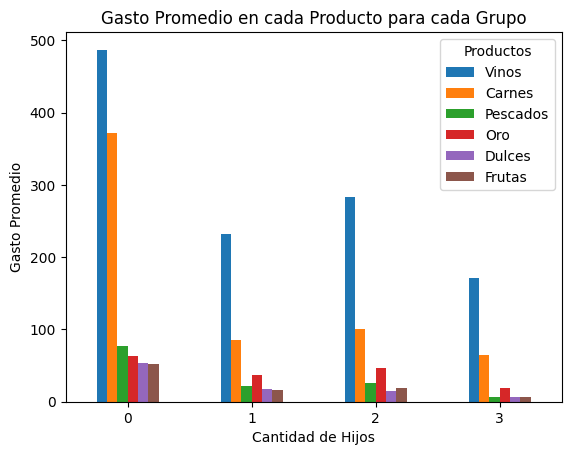

In [54]:
data['Hijos'] = data['AdolecentesEncasa'] | data['NiñosEncasa']

# Columnas de productos
productos = ['Vinos', 'Carnes', 'Pescados', 'Oro', 'Dulces', 'Frutas']

# Calcular el gasto promedio en cada producto para cada grupo
promedio_gasto_por_grupo = data.groupby('Hijos')[productos].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
promedio_gasto_por_grupo.plot(kind='bar')
plt.xlabel('Cantidad de Hijos')
plt.ylabel('Gasto Promedio')
plt.title('Gasto Promedio en cada Producto para cada Grupo')
plt.xticks(rotation=0)
plt.legend(title='Productos', bbox_to_anchor=(1, 1))
plt.show()

En todos los grupos el mayor gasto incurrido es en Vinos y en Carnes.
Tambien se obvserva que a mayor cantidad de hijos, el dinero que tienen disponible para gastos disminuye. Esto puede deberse a que a mayor cantidad de hijos, el dinero dispoible para las compras disminuye.

<Figure size 1000x600 with 0 Axes>

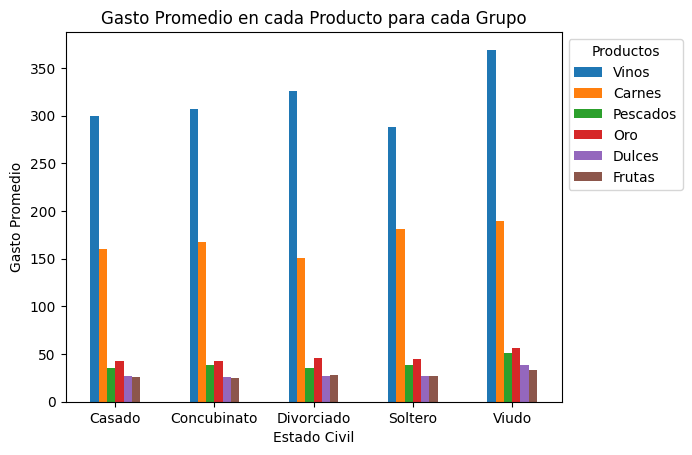

In [55]:

# Columnas de productos
productos = ['Vinos', 'Carnes', 'Pescados', 'Oro', 'Dulces', 'Frutas']

# Calcular el gasto promedio en cada producto para cada grupo
promedio_gasto_por_grupo = data.groupby('Estado_Civil')[productos].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
promedio_gasto_por_grupo.plot(kind='bar')
plt.xlabel('Estado Civil')
plt.ylabel('Gasto Promedio')
plt.title('Gasto Promedio en cada Producto para cada Grupo')
plt.xticks(rotation=0)
plt.legend(title='Productos', bbox_to_anchor=(1, 1))
plt.show()

Se puede ver que el grupo de viudos posee un mayor gasto promedio en todas las categorias, especialmente en vinos.
Seguido por los divorciados. Por ultimo, los solteros tienen el segundo gasto promedio en carne mas elevado. Parecerias ser que el hecho de estar sin pareja, hace que puedan destinar en promedio, una mayor parte de sus ingresos a vino y carne que los otros grupos.

<Figure size 1000x600 with 0 Axes>

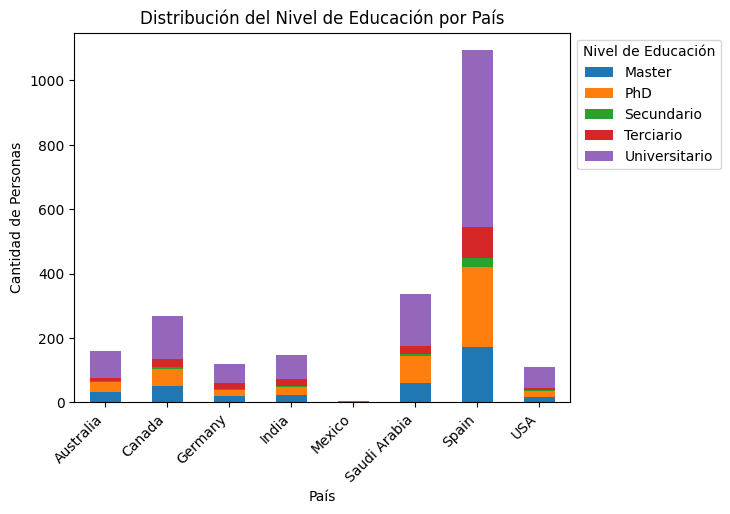

In [56]:
distribucion_educacion_por_pais = data.groupby(['Pais', 'Educacion']).size().unstack()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
distribucion_educacion_por_pais.plot(kind='bar', stacked=True)
plt.xlabel('País')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución del Nivel de Educación por País')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejorar legibilidad
plt.legend(title='Nivel de Educación', bbox_to_anchor=(1, 1))
plt.show()

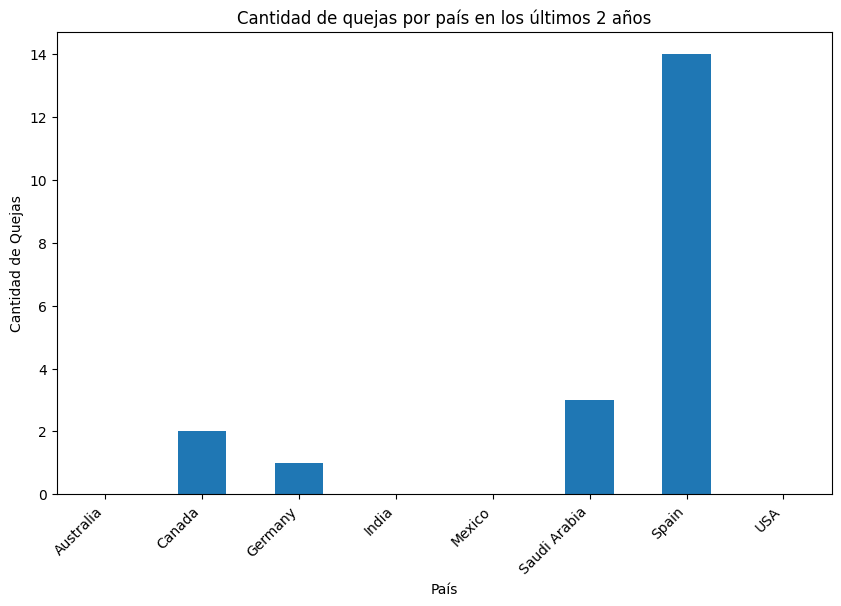

In [57]:
quejas_por_pais = data.groupby('Pais')['Quejas'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
quejas_por_pais.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Cantidad de Quejas')
plt.title('Cantidad de quejas por país en los últimos 2 años')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejorar legibilidad
plt.show()

tomando en consideración que la mayoria de la población es españóla, se puede decir que en los últimos 2 años las quejas han sido muy bajas.

In [58]:
sns.set()

from sklearn.cluster import KMeans

In [59]:
data

,Edad,Educacion,Estado_Civil,Ingreso,NiñosEncasa,AdolecentesEncasa,Vinos,Frutas,Carnes,Pescados,...,Ofertas,Web,Catalogo,Tienda_fisica,Visitas-web,Quejas,Pais,Hijos,Grupo,Edad_intervalo
0,53,Universitario,Divorciado,84835.0,0,0,189,104,379,111,...,1,4,4,6,1,0,Spain,0,0,"[50, 55)"
1,62,Universitario,Soltero,57091.0,0,0,464,5,64,7,...,1,7,3,7,5,0,Canada,0,0,"[60, 65)"
2,65,Universitario,Casado,67267.0,0,1,134,11,59,15,...,1,3,2,5,2,0,USA,1,1,"[65, 70)"
3,56,Universitario,Concubinato,32474.0,1,1,10,0,1,0,...,1,1,0,2,7,0,Australia,1,1,"[55, 60)"
4,34,Universitario,Soltero,21474.0,1,0,6,16,24,11,...,2,3,1,2,7,0,Spain,1,1,"[30, 35)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,47,PhD,Divorciado,66476.0,0,1,372,18,126,47,...,2,5,2,11,4,0,USA,1,1,"[45, 50)"
2236,46,Terciario,Casado,31056.0,1,0,5,10,13,3,...,1,1,0,3,8,0,Spain,1,1,"[45, 50)"
2237,47,Universitario,Divorciado,46310.0,1,0,185,2,88,15,...,2,6,1,5,8,0,Spain,1,1,"[45, 50)"
2238,45,Universitario,Casado,65819.0,0,0,267,38,701,149,...,1,5,4,10,3,0,India,0,0,"[45, 50)"


In [60]:
data.dtypes

Edad                    int64
Educacion              object
Estado_Civil           object
Ingreso               float64
NiñosEncasa             int64
AdolecentesEncasa       int64
Vinos                   int64
Frutas                  int64
Carnes                  int64
Pescados                int64
Dulces                  int64
Oro                     int64
Ofertas                 int64
Web                     int64
Catalogo                int64
Tienda_fisica           int64
Visitas-web             int64
Quejas                  int64
Pais                   object
Hijos                   int64
Grupo                   int64
Edad_intervalo       category
dtype: object

#Modelado

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Edad               2236 non-null   int64   
 1   Educacion          2236 non-null   object  
 2   Estado_Civil       2236 non-null   object  
 3   Ingreso            2236 non-null   float64 
 4   NiñosEncasa        2236 non-null   int64   
 5   AdolecentesEncasa  2236 non-null   int64   
 6   Vinos              2236 non-null   int64   
 7   Frutas             2236 non-null   int64   
 8   Carnes             2236 non-null   int64   
 9   Pescados           2236 non-null   int64   
 10  Dulces             2236 non-null   int64   
 11  Oro                2236 non-null   int64   
 12  Ofertas            2236 non-null   int64   
 13  Web                2236 non-null   int64   
 14  Catalogo           2236 non-null   int64   
 15  Tienda_fisica      2236 non-null   int64   
 16  Visita

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [63]:
data_encoded = pd.get_dummies(data, columns=['Educacion', 'Estado_Civil', 'Pais'], drop_first=True)

In [64]:
data_encoded.drop('Edad_intervalo', axis=1, inplace=True)


In [65]:
data_encoded.dtypes

Edad                          int64
Ingreso                     float64
NiñosEncasa                   int64
AdolecentesEncasa             int64
Vinos                         int64
Frutas                        int64
Carnes                        int64
Pescados                      int64
Dulces                        int64
Oro                           int64
Ofertas                       int64
Web                           int64
Catalogo                      int64
Tienda_fisica                 int64
Visitas-web                   int64
Quejas                        int64
Hijos                         int64
Grupo                         int64
Educacion_PhD                 uint8
Educacion_Secundario          uint8
Educacion_Terciario           uint8
Educacion_Universitario       uint8
Estado_Civil_Concubinato      uint8
Estado_Civil_Divorciado       uint8
Estado_Civil_Soltero          uint8
Estado_Civil_Viudo            uint8
Pais_Canada                   uint8
Pais_Germany                

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suponiendo que tienes tus datos en un DataFrame llamado "df"
# Si no tienes los datos en un DataFrame, asegúrate de cargarlos primero desde tu fuente de datos

# Elimina las columnas no relevantes para el clustering
df_clustering = data.drop(columns=['Edad', 'Educacion', 'Estado_Civil', 'Pais', 'Edad_intervalo'])

# Escala los datos para que tengan media cero y varianza unitaria
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Establece el número de clusters que deseas obtener
num_clusters = 5

# Crea el objeto KMeans con el número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajusta el modelo a tus datos escalados
kmeans.fit(df_scaled)

# Obtiene las etiquetas de los clusters para cada punto de datos
labels = kmeans.labels_

# Agrega las etiquetas de clusters al DataFrame original
data['Cluster'] = labels

# Visualiza los resultados si es necesario
print(data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Edad      Educacion Estado_Civil  Ingreso  NiñosEncasa  AdolecentesEncasa  \
0    53  Universitario   Divorciado  84835.0            0                  0   
1    62  Universitario      Soltero  57091.0            0                  0   
2    65  Universitario       Casado  67267.0            0                  1   
3    56  Universitario  Concubinato  32474.0            1                  1   
4    34  Universitario      Soltero  21474.0            1                  0   

   Vinos  Frutas  Carnes  Pescados  ...  Web  Catalogo  Tienda_fisica  \
0    189     104     379       111  ...    4         4              6   
1    464       5      64         7  ...    7         3              7   
2    134      11      59        15  ...    3         2              5   
3     10       0       1         0  ...    1         0              2   
4      6      16      24        11  ...    3         1              2   

   Visitas-web  Quejas       Pais  Hijos  Grupo Edad_intervalo  Cluster  
0     

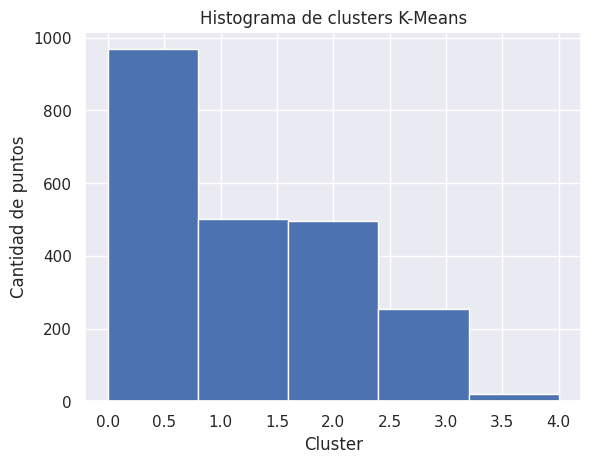

In [67]:
# Suponiendo que ya tienes el DataFrame "df" con la columna "Cluster" agregada
import matplotlib.pyplot as plt
plt.hist(data['Cluster'], bins=num_clusters)
plt.xlabel('Cluster')
plt.ylabel('Cantidad de puntos')
plt.title('Histograma de clusters K-Means')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

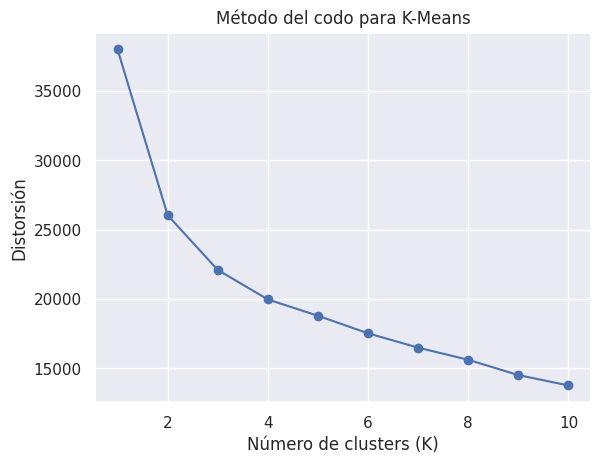

In [68]:
distortions = []
K_range = range(1, 11)  # Prueba con diferentes valores de K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Distorsión')
plt.title('Método del codo para K-Means')
plt.show()


In [69]:
data.dtypes

Edad                    int64
Educacion              object
Estado_Civil           object
Ingreso               float64
NiñosEncasa             int64
AdolecentesEncasa       int64
Vinos                   int64
Frutas                  int64
Carnes                  int64
Pescados                int64
Dulces                  int64
Oro                     int64
Ofertas                 int64
Web                     int64
Catalogo                int64
Tienda_fisica           int64
Visitas-web             int64
Quejas                  int64
Pais                   object
Hijos                   int64
Grupo                   int64
Edad_intervalo       category
Cluster                 int32
dtype: object

In [70]:
data_numeric = data.drop(columns=['Educacion', 'Estado_Civil', 'Pais', 'Edad_intervalo'])
data_all_columns = pd.concat([data_numeric, data_encoded], axis=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data_all_columns)


In [71]:
data_all_columns.dtypes


Edad                          int64
Ingreso                     float64
NiñosEncasa                   int64
AdolecentesEncasa             int64
Vinos                         int64
Frutas                        int64
Carnes                        int64
Pescados                      int64
Dulces                        int64
Oro                           int64
Ofertas                       int64
Web                           int64
Catalogo                      int64
Tienda_fisica                 int64
Visitas-web                   int64
Quejas                        int64
Hijos                         int64
Grupo                         int64
Cluster                       int32
Edad                          int64
Ingreso                     float64
NiñosEncasa                   int64
AdolecentesEncasa             int64
Vinos                         int64
Frutas                        int64
Carnes                        int64
Pescados                      int64
Dulces                      

In [72]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_std)

# Crear un nuevo DataFrame con las componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=[f'Componente_{i}' for i in range(1, pca.n_components_ + 1)])

print(data_pca_df.head())

   Componente_1  Componente_2  Componente_3  Componente_4  Componente_5  \
0      6.955421     -1.803372      2.239032      1.658588     -0.591391   
1      1.343071     -1.557993     -1.543814     -1.957943      0.992992   
2     -0.380077      0.608884     -2.159248      1.721007     -0.591998   
3     -4.224011     -0.659215     -0.580345      1.157266     -0.411716   
4     -3.622118     -2.176440      2.362370     -0.313341     -0.067670   

   Componente_6  Componente_7  Componente_8  Componente_9  Componente_10  
0     -3.385069     -1.247071      0.518368      0.235049       0.508316  
1     -0.476129      1.248475     -1.599153     -1.124712       1.248897  
2     -1.268236      1.188300     -2.366736     -0.772053       0.860350  
3     -0.962749      0.659870     -0.403051      0.269610      -1.363819  
4      0.277777     -1.433074     -1.428146     -0.017040       0.540976  


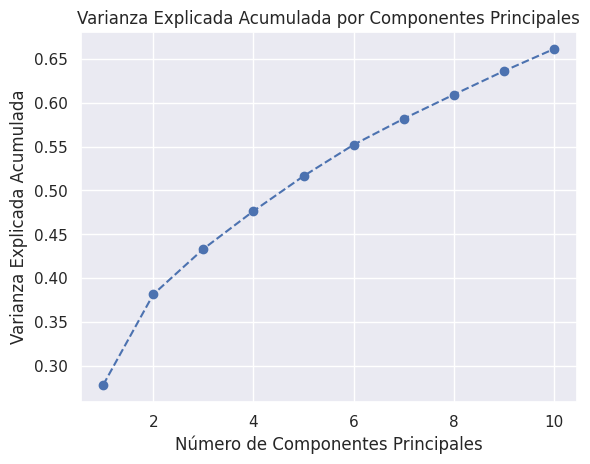

In [73]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.show()

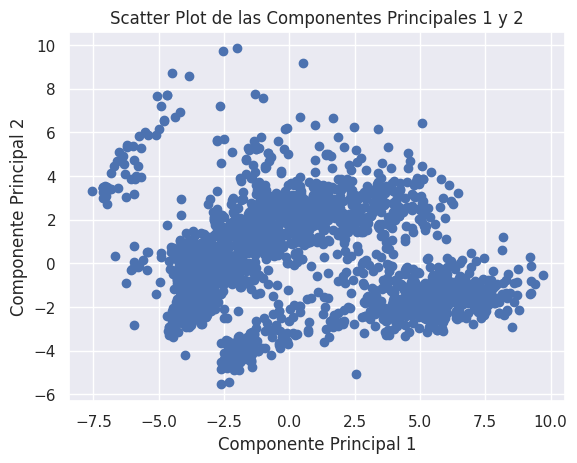

In [74]:
plt.scatter(data_pca_df['Componente_1'], data_pca_df['Componente_2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Scatter Plot de las Componentes Principales 1 y 2')
plt.show()

In [75]:
component_weights = pd.DataFrame(pca.components_, columns=data_all_columns.columns)

# Crear un diccionario para mapear el nombre de las variables originales a los nombres de las componentes principales
column_name_map = {}
for i in range(1, pca.n_components_ + 1):
    component_name = f'Componente_{i}'
    column_name_map[component_name] = component_weights.loc[i - 1].idxmax()

# Renombrar las columnas del DataFrame de componentes principales
data_pca_df.rename(columns=column_name_map, inplace=True)

# Mostrar el DataFrame de componentes principales con los nombres de las variables originales
print(data_pca_df.head())

    Ingreso  AdolecentesEncasa  NiñosEncasa    Quejas    Quejas  \
0  6.955421          -1.803372     2.239032  1.658588 -0.591391   
1  1.343071          -1.557993    -1.543814 -1.957943  0.992992   
2 -0.380077           0.608884    -2.159248  1.721007 -0.591998   
3 -4.224011          -0.659215    -0.580345  1.157266 -0.411716   
4 -3.622118          -2.176440     2.362370 -0.313341 -0.067670   

   Educacion_PhD  Pais_Saudi Arabia  Educacion_Terciario   Ofertas  \
0      -3.385069          -1.247071             0.518368  0.235049   
1      -0.476129           1.248475            -1.599153 -1.124712   
2      -1.268236           1.188300            -2.366736 -0.772053   
3      -0.962749           0.659870            -0.403051  0.269610   
4       0.277777          -1.433074            -1.428146 -0.017040   

   Estado_Civil_Soltero  
0              0.508316  
1              1.248897  
2              0.860350  
3             -1.363819  
4              0.540976  


In [76]:
data_all_columns.dtypes

Edad                          int64
Ingreso                     float64
NiñosEncasa                   int64
AdolecentesEncasa             int64
Vinos                         int64
Frutas                        int64
Carnes                        int64
Pescados                      int64
Dulces                        int64
Oro                           int64
Ofertas                       int64
Web                           int64
Catalogo                      int64
Tienda_fisica                 int64
Visitas-web                   int64
Quejas                        int64
Hijos                         int64
Grupo                         int64
Cluster                       int32
Edad                          int64
Ingreso                     float64
NiñosEncasa                   int64
AdolecentesEncasa             int64
Vinos                         int64
Frutas                        int64
Carnes                        int64
Pescados                      int64
Dulces                      

In [77]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustar el modelo a los datos de las componentes principales
kmeans.fit(data_pca_df)

# Obtener las etiquetas de los clusters asignadas a cada muestra
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame de las componentes principales
data_pca_df['Cluster'] = labels

# Verificar el DataFrame resultante con las etiquetas de clusters
print(data_pca_df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Ingreso  AdolecentesEncasa  NiñosEncasa    Quejas    Quejas  \
0  6.955421          -1.803372     2.239032  1.658588 -0.591391   
1  1.343071          -1.557993    -1.543814 -1.957943  0.992992   
2 -0.380077           0.608884    -2.159248  1.721007 -0.591998   
3 -4.224011          -0.659215    -0.580345  1.157266 -0.411716   
4 -3.622118          -2.176440     2.362370 -0.313341 -0.067670   

   Educacion_PhD  Pais_Saudi Arabia  Educacion_Terciario   Ofertas  \
0      -3.385069          -1.247071             0.518368  0.235049   
1      -0.476129           1.248475            -1.599153 -1.124712   
2      -1.268236           1.188300            -2.366736 -0.772053   
3      -0.962749           0.659870            -0.403051  0.269610   
4       0.277777          -1.433074            -1.428146 -0.017040   

   Estado_Civil_Soltero  Cluster  
0              0.508316        1  
1              1.248897        0  
2              0.860350        0  
3             -1.363819        2  
4

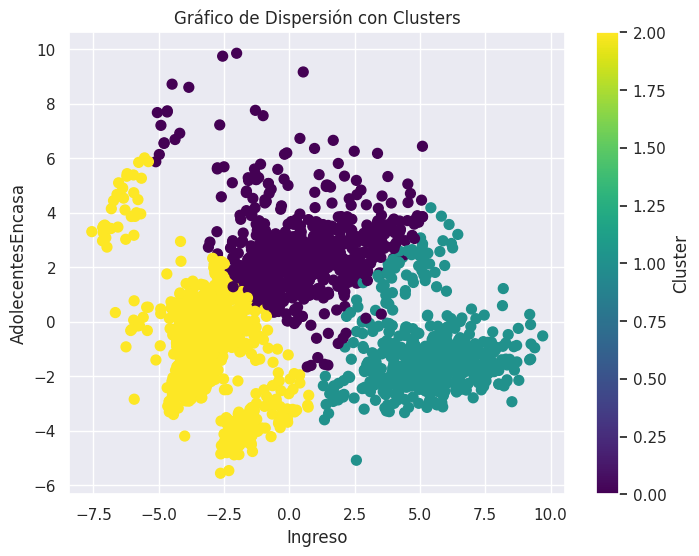

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_df['Ingreso'], data_pca_df['AdolecentesEncasa'], c=data_pca_df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Ingreso')
plt.ylabel('AdolecentesEncasa')
plt.title('Gráfico de Dispersión con Clusters')
plt.colorbar(label='Cluster')
plt.show()

Se pueden diferenciar 3 clusters diferentes, de esta forma se puede clasificar a un futuro cliente para así ofrecerle específicamente lo que mejor le vaya a servir.

In [79]:
ingresos_manual = [55000, 60000, 40000, 45000, 120000, 65000, 140000, 90000, 55000, 100000]

adolescentes_manual = [1, 2, 0, 3, 2, 1, 0, 4, 1, 2]

# Creo nuevo DataFrame
data_subset = pd.DataFrame({'Ingreso': ingresos_manual, 'AdolecentesEncasa': adolescentes_manual})

print(data_subset)

   Ingreso  AdolecentesEncasa
0    55000                  1
1    60000                  2
2    40000                  0
3    45000                  3
4   120000                  2
5    65000                  1
6   140000                  0
7    90000                  4
8    55000                  1
9   100000                  2


Cree un nuevo set de datos para probar el cluster


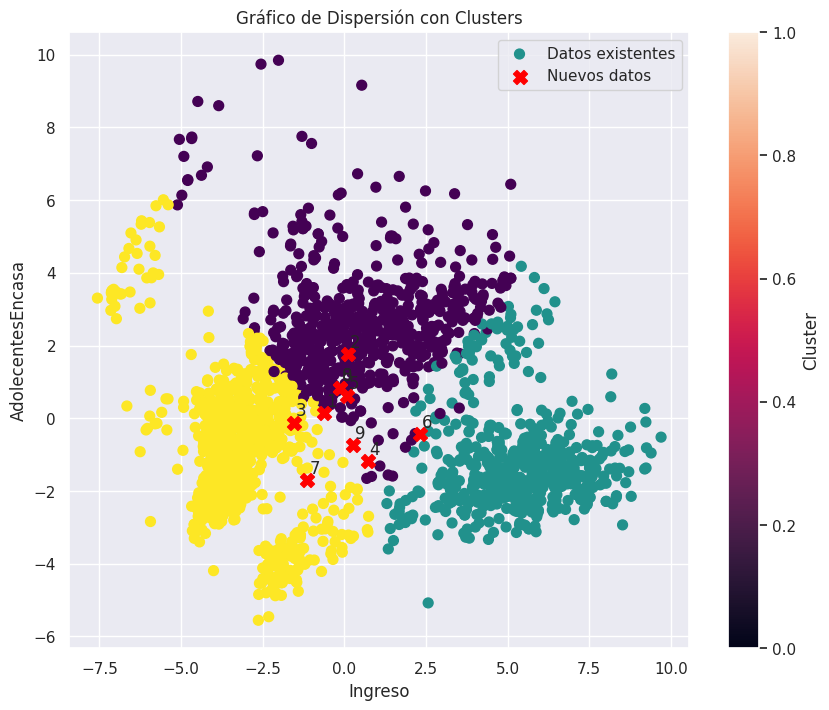

In [80]:

# Estandarizar los datos del nuevo dataset
scaler = StandardScaler()
data_subset_std = scaler.fit_transform(data_subset)

# Ajustar un nuevo PCA solo con los datos del nuevo dataset
pca_subset = PCA(n_components=2)
data_subset_pca = pca_subset.fit_transform(data_subset_std)

# Crear un DataFrame para los datos del nuevo dataset después de la reducción de dimensionalidad
data_subset_pca_df = pd.DataFrame(data_subset_pca, columns=[f'Componente_{i}' for i in range(1, pca_subset.n_components_ + 1)])

plt.figure(figsize=(10, 8))

# Gráfico de dispersión con los datos originales y sus clusters
scatter_clusters = plt.scatter(data_pca_df['Ingreso'], data_pca_df['AdolecentesEncasa'], c=data_pca_df['Cluster'], cmap='viridis', s=50, label='Datos existentes')

# Gráfico de dispersión con los nuevos datos (data_subset) después de la reducción de dimensionalidad
scatter_subset = plt.scatter(data_subset_pca_df['Componente_1'], data_subset_pca_df['Componente_2'], c='red', marker='X', s=100, label='Nuevos datos')

# Agregar etiquetas a los puntos con los nombres de los datos del nuevo dataset
for i, label in enumerate(data_subset.index):
    plt.annotate(label, (data_subset_pca_df['Componente_1'][i], data_subset_pca_df['Componente_2'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('Ingreso')
plt.ylabel('AdolecentesEncasa')
plt.title('Gráfico de Dispersión con Clusters')
plt.colorbar(label='Cluster')
plt.legend(handles=[scatter_clusters, scatter_subset], labels=['Datos existentes', 'Nuevos datos'])
plt.show()

In [81]:
kmeans_subset = KMeans(n_clusters=3, random_state=42)

# Ajusta el modelo a los datos escalados del nuevo dataset
kmeans_subset.fit(data_subset_std)

# Predecir los clusters para los datos del nuevo dataset
data_subset_clusters = kmeans_subset.predict(data_subset_std)

# Agregar una nueva columna al DataFrame de los nuevos datos con la información de los clusters
data_subset['Cluster'] = data_subset_clusters

# Mostrar la lista con los nombres de las personas y a qué cluster pertenecen
print(data_subset)

   Ingreso  AdolecentesEncasa  Cluster
0    55000                  1        1
1    60000                  2        1
2    40000                  0        1
3    45000                  3        0
4   120000                  2        2
5    65000                  1        1
6   140000                  0        2
7    90000                  4        0
8    55000                  1        1
9   100000                  2        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Acá se puede observar como se clasificó a los nuevos clientes de este data set inventado, permitiendo así conseguir la clasificacion de los clientes en algunos de los 3 clusters previamente generados.

#Conclusiones


 A través del análisis de datos y el algoritmo de clustering KMeans, se han
identificado 3 clusters que agrupan a los clientes según su ingreso y la
cantidad de hijos adolescentes que tienen. Esta información permitirá a la empresa personalizar sus estrategias de marketing y ofertas para cada grupo de clientes de manera más efectiva.

Si bien las tiendas físicas son actualmente el medio de venta preferido, las visitas a la página web y las compras en línea son significativas, es por esto que se sugiere hacer foco en incrementar la cantidad de compras a través de la web mediante una campaña de marketing dirigida.

En relación a los productos, los vinos son los más vendidos, seguidos por las carnes, especialmente entre aquellos con mayores ingresos. También se ha notado que a mayor cantidad de hijos, los clientes tienden a tener un menor presupuesto disponible para compras.

Ademas, se ha observado una correlación positiva entre la edad y el ingreso, lo que indica que a medida que aumenta la edad, los clientes tienden a tener un mayor poder adquisitivo y gasto promedio. No obstante, la educación también influye en los niveles de ingresos y gastos, mostrando que aquellos con educación universitaria tienen un mayor poder adquisitivo comparado a aquellos con nivel de educación secundaria.

En relación al estado civil, los viudos y divorciados han mostrado un mayor gasto promedio, especialmente en vinos, mientras que los solteros destacan por su gasto en carne. Esta diferencia en los hábitos de gasto podría atribuirse a las circunstancias personales y financieras de cada grupo.

Por último, se observa que la cantidad de quejas ha sido baja en los últimos dos años, lo que sugiere un alto nivel de satisfacción entre los clientes.

En conclusión, el análisis de datos y el clustering nos han proporcionado información valiosa sobre el comportamiento y las preferencias de los clientes. Estos hallazgos permitirán a la empresa optimizar sus estrategias de marketing y ventas, mejorando la satisfacción del cliente y la rentabilidad del negocio.